In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prediction import Prediction

In [2]:
filename="housing.csv"
cols=(2,3,4,5,6,7,8)
feature_names=['Median Housing Age','Total Rooms','Total Bedrooms','Population','Households',
                   'Median Income']
target_name='Median Housevalue'

# Information about the Dataset

For this part, I am using the housing price dataset in California. We extracted this dataset from Kaggle.com. The dataset has the followign features-
- Median age of the house
- Total rooms
- Total bedrooms
- Total population
- Total households
- Median income

The target variable for this exercise is- Median housevalue

The price of a house is not decided independly. In urban developement research, there is vast literature that has studied the factors that impact housing price in a given area. In this project, I want to look at the relationship between the above described features and the housing price. While the relationship in this project will be only be correlational (and not causal), we will also do some statistical analysis to find out if the calculated OLS (Ordinary Least Square) estimates are actually significant. 

If we look at housing as an investment option (this happens a lot in India), then it actually makes a lot of sense to estimate the correlation coeeficients to get some idea of what the future value of my investment can be. 

In [3]:
g=Prediction(filename,cols,feature_names, target_name)

# Plotting relationship between features and target variable

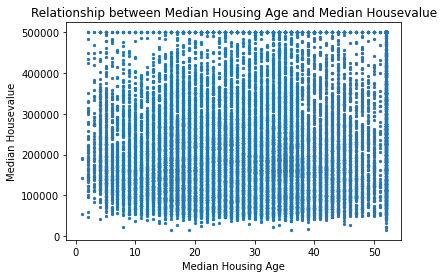

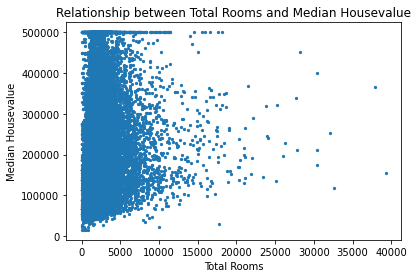

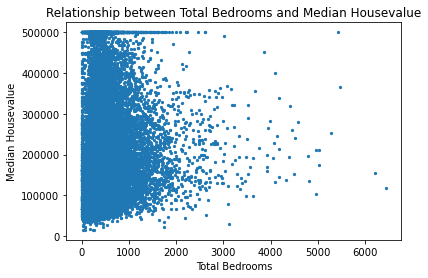

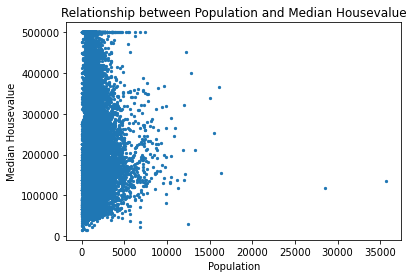

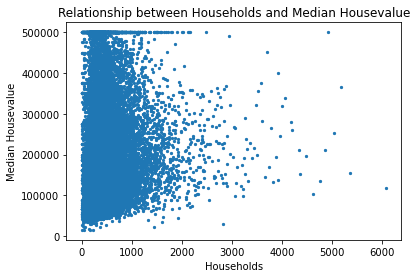

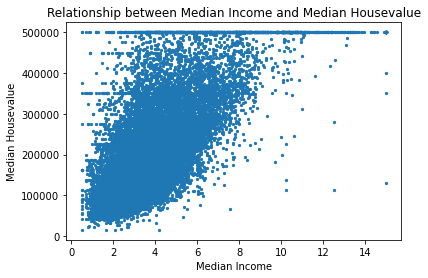

In [4]:
g.plot_relation()

The above section plots correlation betweeen each feature and the housing value independently. Of all the graphs, the relationship between median income and median housevalue is most significant. We will be able to confirm this when we run our regressions but graphically, the other variables do not show a very obvious correlation. 

# Standardizing the dataset

In [5]:
g.standardize()

# Regressing target variable on each feature

In [6]:
minimum_res, BETA, variable_name=g.best_fit()

print("The feature with minimum residual is {}".format(minimum_res))
print("\n")
for i in range (len(BETA)):
    intercept=round(BETA[i][0],2)
    slope= round(BETA[i][1],2)
    variable=variable_name[i]
    
    print("{} and {} are intercept and slope respectively for {}".format(intercept,slope,variable))
    

The feature with minimum residual is Median Income


-0.0 and 0.11 are intercept and slope respectively for Median Housing Age
-0.0 and 0.13 are intercept and slope respectively for Total Rooms
-0.0 and 0.05 are intercept and slope respectively for Total Bedrooms
-0.0 and -0.02 are intercept and slope respectively for Population
-0.0 and 0.07 are intercept and slope respectively for Households
-0.0 and 0.69 are intercept and slope respectively for Median Income


In the results above, we have intercept and slope when our target variable is regressed on each of our feature variables independently.
So how do we interpret these slopes? If median housing age increases by 1, then the median housing value increases by .11

As we saw in the graphs, Median Income has highest correlation coefficient. However, I will be careful while interpreting this coefficient. The way median income is difined in the dataset is different from the other variables. Median Income is not defined in absolute terms. Rather, it is defined in tens of thousands (from what I can infer). This means that a unit increase in income in our dataset would lead to increase income by 10000 (or 1000, not very sure) in reality. Therefore if income increases by 10000, then median housing value increases by .69 

While best fit line gives us a sense of the direction of correlation, I'll be careful in drawing any conclusions using the results of single feature regressions. This is because there are several variables that are omitted which are related with both our main feature and also the target variable. This makes the coefficient biased. 

In the next section, I will conduct a multifeature regression also look at their corresponding p-values to get more insight into the significance of the feature in the regression framework. 

# Extra credit: Multi-feature Regression, Quadratic Relationship and Hypothesis Testing

In [7]:
beta_numpy, regressor_results=g.multivariate()
variable_name.append("Housing age squared")
print("\nThe intercept is{}".format(beta_numpy[0]))
print("In a multi-feature regression, we get the following slopes")
for i in range (1,len(beta_numpy)):
    slope= beta_numpy[i]
    print("The slope for {} is {}".format(variable_name[i-1],slope))
    


The intercept is-0.0209
In a multi-feature regression, we get the following slopes
The slope for Median Housing Age is 0.2001
The slope for Total Rooms is -0.3316
The slope for Total Bedrooms is 0.1857
The slope for Population is -0.3634
The slope for Households is 0.5693
The slope for Median Income is 0.772
The slope for Housing age squared is 0.0209


So how do we interpret the results above? Lets look at Median Housing Age. Ceterus Paribus, if Median Housing age increases by 1 then median house value increases by (.20-.0209)

Compared to the sigle feature regression, this model is more robust. We are now controlling for more features and reducing (but not eliminating) the Omitted Variable Bias. Note that the coefficients still don't signify any causal relationship. These are only correlation coefficients and the equation should not be interpreted as a causal relationship. 

In [8]:
print(regressor_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3833.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:19:53   Log-Likelihood:                -20690.
No. Observations:               20640   AIC:                         4.140e+04
Df Residuals:                   20632   BIC:                         4.146e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0209      0.006     -3.327      0.0

To produce the above table, I use the Statsmodel library in Python. This library contains several classes and functions that allows us to perform several statistical analysis. In this question, I am interested in looking at the p-value which will allow me talk about the significance of a variable in the regression equation. 

null hypothesis: Feature has no impact

alternative hypothesis: Feature has non-null impact

If p-value is very low, we reject the null in favor of the alternative. In the table above, we can see that the p-value for each variable is 0. Therefore, each variable is statistically significant. 

Other than the significance test, I was also trying to test if Housing Age has a reducing Quadratic relationship with median house value. So I squared the Housing Age and included it in my regression equation. The coefficient for the squared variable is positive which suggests that the relationship between housing age and median housign value is not reducing quadratic. It should be noted that we should not include functions of our features in our regression equation unless we have a strong theoretical or empirical foundation that supports its inclusion. 